In [18]:

import os
import csv
import argparse
import numpy as np 
import scipy.misc
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

file = 'data/fer2013/fer2013.csv'
output = 'data/fer2013/extracted'

w, h = 48, 48
image = np.zeros((h, w), dtype=np.uint8)
id = 1
from PIL import Image
from matplotlib.pyplot import imshow
# with open(file, 'r') as csvfile:
#     datareader = csv.reader(csvfile, delimiter =',')
# #     print headers 
#     for i,row in enumerate(datareader):  
#         if i==0:
#             continue
#         emotion = row[0]
#         pixels = list(map(int, row[1].split()))
# #         print(row)
#         usage = row[2]
#         #print emotion, type(pixels[0]), usage
#         pixels_array = np.asarray(pixels)

#         image = pixels_array.reshape(w, h)
#         #print image.shape

#         stacked_image = np.dstack((image,) * 3)
#         #print stacked_image.shape


#         image_folder = os.path.join(output, usage)
#         if not os.path.exists(image_folder):
#             os.makedirs(image_folder)
#         image_file =  os.path.join(image_folder , str(id) + '.jpg')
#         scipy.misc.imsave(image_file, stacked_image)
#         id += 1 
#         if id % 100 == 0:
#             print('Processed {} images'.format(id))

# print("Finished processing {} images".format(id))

In [3]:
import pandas as pd 
dataset = pd.read_csv(file)

In [ ]:
# for i, dirname in enumerate(dirnames):
#     filenames =[ os.path.join(dirname,filename) for filename in os.listdir(dirname)]
#     img=mpimg.imread(np.random.choice(filenames))
#     plt.subplot(len(dirnames) / columns + 1, columns, i + 1)
#     plt.imshow(img)
# plt.show()

### 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral


In [4]:
dataset.iloc[:10,:]

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
9,2,255 254 255 254 254 179 122 107 95 124 149 150...,Training


In [31]:
dataset.Usage.unique()

array(['Training', 'PublicTest', 'PrivateTest'], dtype=object)

In [24]:

training = dataset[dataset['Usage']=='Training']
validation = dataset[dataset['Usage']=='PublicTest']
test = dataset[dataset['Usage']=='PrivateTest']
training.shape
validation.shape
test.shape

(28709, 3)

(3589, 3)

(3589, 3)

In [25]:
train_val_common = set(training.pixels) & set(validation.pixels)
train_test_common = set(training.pixels) & set(test.pixels)
len(train_val_common)
len(train_test_common)

270

278

In [29]:
validation = validation[~validation['pixels'].isin(train_val_common)]
test = test[~test['pixels'].isin(train_test_common)]

In [98]:
def pixstr2numpy(pixstr):
    pixels = np.array(pixstr.split())
    pixels = pixels.reshape(w, h)
    return pixels.astype(np.int32)

def to3D(array):
    size = array.shape[0]
    X_t = np.zeros((size,48,48))
    for i,x in enumerate(array):
        X_t[i,:,:] = x
    X_t = X_t.astype(np.int32)
    return X_t

def X_Y_split(df):
    X_train,Y_train = training['pixels'].apply(pixstr2numpy),training['emotion'].astype(np.int32)
    X_train = np.array(X_train)
    X_train = to3D(X_train)
    Y_train  = Y_train.values
    return X_train,Y_train

In [37]:
X_train,Y_train = training['pixels'].apply(pixstr2numpy),training['emotion'].astype(np.int32)

In [99]:
X_train,Y_train = X_Y_split(training)

In [103]:
X_validation,Y_validation = X_Y_split(validation)
X_test,Y_test = X_Y_split(test)

In [104]:
X_test.shape

(28709, 48, 48)

In [102]:
X_train.shape
Y_train.shape

(28709, 48, 48)

(28709,)

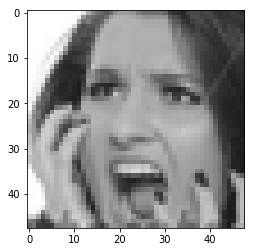

In [28]:
disp(ranpix)

In [ ]:
train = dataset[dataset.Usage=='Training']
test = dataset[dataset.Usage=='Training']

In [10]:

pixels = np.array(dataset.iloc[0,1].split())

In [18]:
pixels = pixels.astype(np.int32)
pixels = pixels.reshape(w, h)
im = Image.fromarray(pixels,mode='I') # np.asarray to convert back

In [14]:
def disp(pixels):
    pixels = np.array(pixels.split())
    pixels = pixels.astype(np.int32)
    pixels = pixels.reshape(w, h)
    im = Image.fromarray(pixels,mode='I') 
    imshow(im)

In [73]:
def dis(array):
    im = Image.fromarray(array,mode='I') 
    imshow(im)

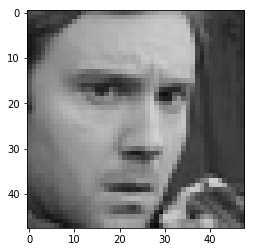

In [28]:
imshow(im)

In [25]:
from IPython.display import display,Image as jupI
display(jupI(pixels))